In [18]:
import scanpy as sc

adata = sc.datasets.pbmc3k()


In [19]:
print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


n_obs = no of cells 
n_vars = no of genes

In [20]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
print(adata.obs)

                  n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
index                                                                        
AAACATACAACCAC-1                781                 6.661855        2421.0   
AAACATTGAGCTAC-1               1352                 7.210080        4903.0   
AAACATTGATCAGC-1               1131                 7.031741        3149.0   
AAACCGTGCTTCCG-1                960                 6.867974        2639.0   
AAACCGTGTATGCG-1                522                 6.259581         981.0   
...                             ...                      ...           ...   
TTTCGAACTCTCAT-1               1155                 7.052721        3461.0   
TTTCTACTGAGGCA-1               1227                 7.113142        3447.0   
TTTCTACTTCCTCG-1                622                 6.434547        1684.0   
TTTGCATGAGAGGC-1                454                 6.120297        1024.0   
TTTGCATGCCTCAC-1                724                 6.586172    

In [21]:
sc.pp.filter_cells(adata, min_genes=50)
sc.pp.filter_genes(adata, min_cells=1)
print(adata.shape)  # (cells, genes)


(2700, 16634)


In [22]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=2000)
print(adata.shape)  # (cells, genes)

(2700, 16634)


In [ ]:

adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)

#PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/var/folders/s1/334w72fn4gn4f_6nf99tmqnm0000gn/T/ipykernel_22191/916067404.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


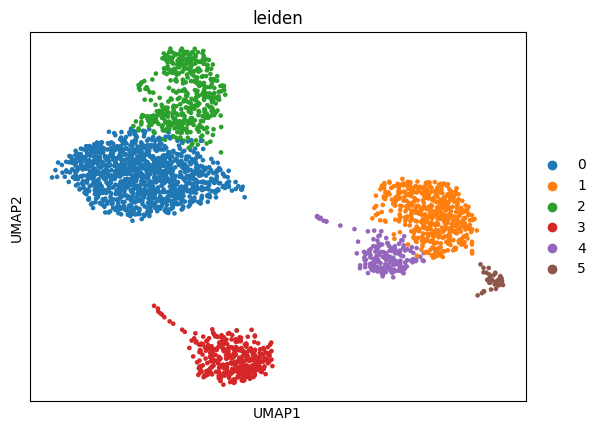

In [28]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])

Index(['TNFRSF4', 'CPSF3L', 'ATAD3C', 'RER1', 'TNFRSF25', 'TNFRSF9',
       'CTNNBIP1', 'UBIAD1', 'DRAXIN', 'NPPA-AS1', 'TNFRSF1B', 'DDI2', 'SPEN',
       'SDHB', 'CAPZB', 'CAMK2N1', 'CDA', 'C1QA', 'C1QC', 'C1QB'],
      dtype='object', name='index')
['CDA', 'SPOCD1', 'CCDC163P', 'CD160', 'C2CD4D', 'CD247', 'CDC42EP3', 'CCDC115', 'PDCD1', 'CCDC174', 'CCDC12', 'PRKCD', 'CCDC66', 'CD47', 'CD96', 'CDV3', 'CD74', 'CD2AP', 'CDC40', 'CDK19']


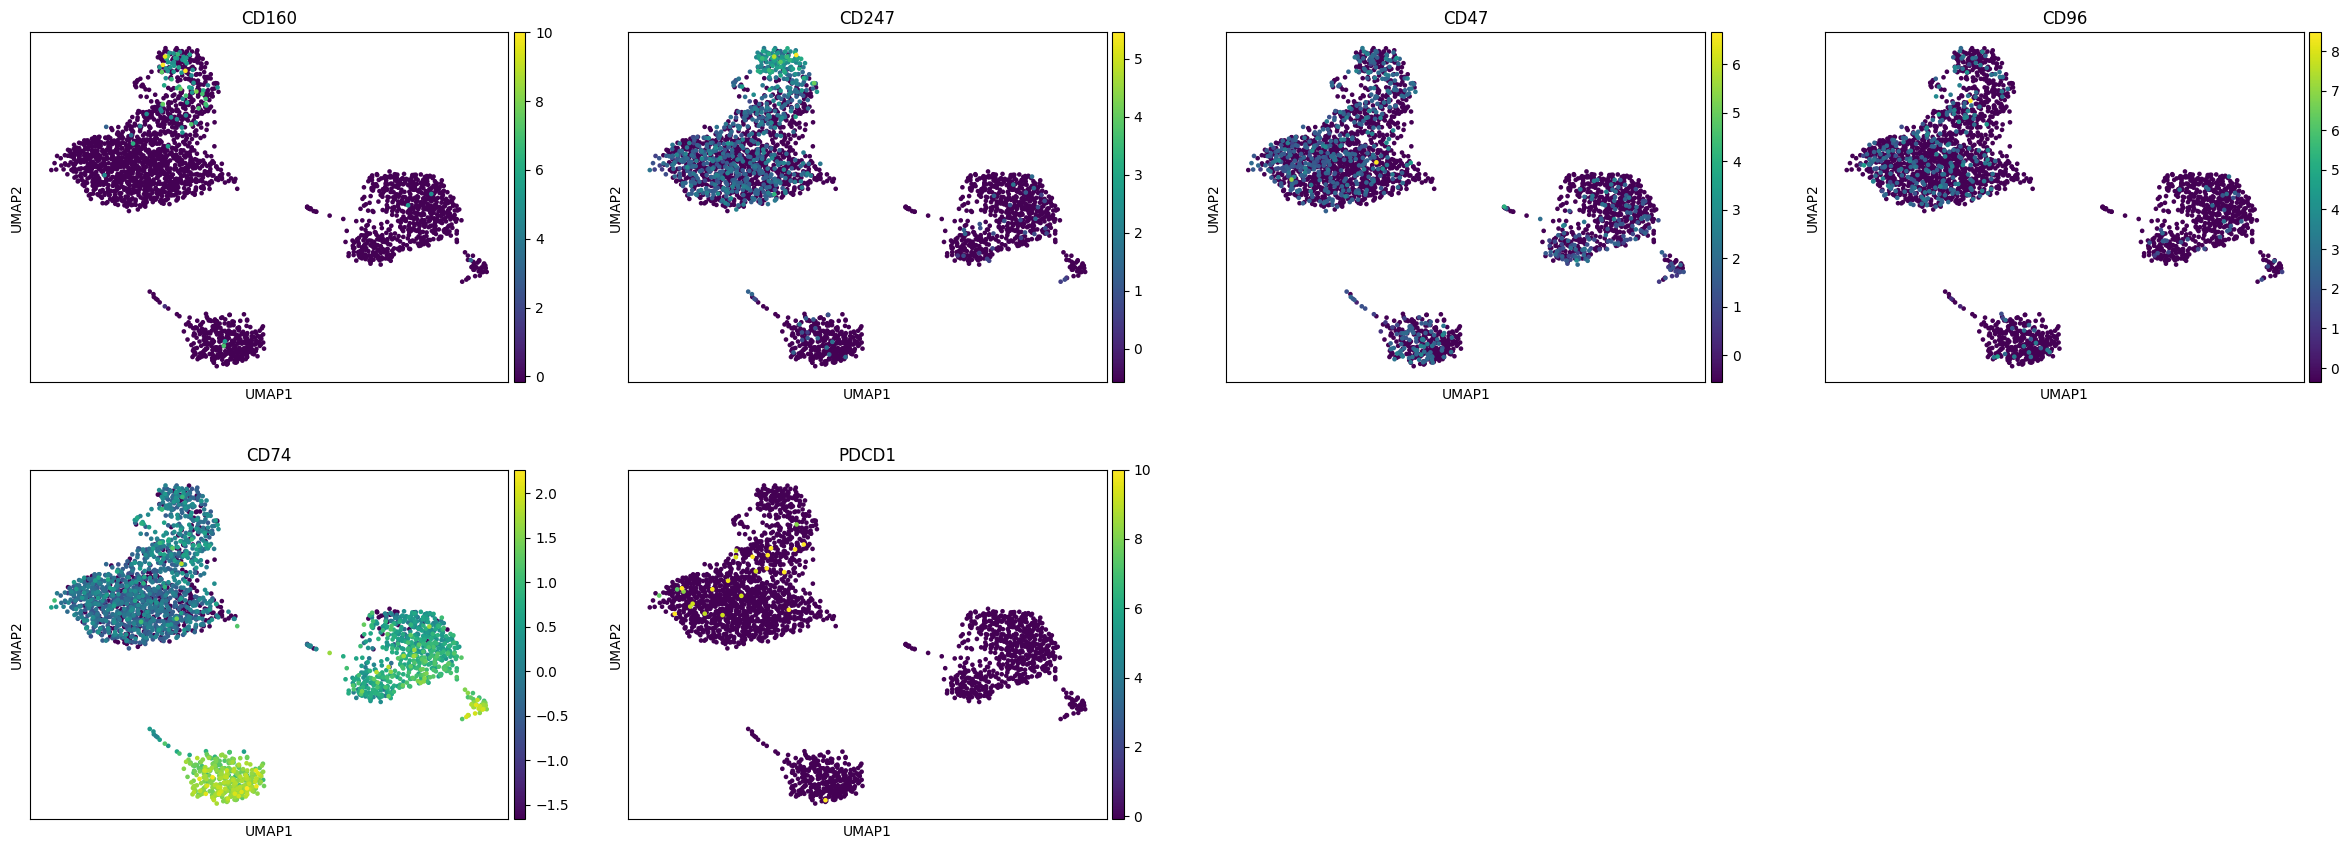

In [34]:

print(adata.var_names[:20])
print([gene for gene in adata.var_names if 'CD' in gene][:20])

genes = ['CD160', 'CD247', 'CD47', 'CD96', 'CD74', 'PDCD1']


 # for gene in marker_genes:
sc.pl.umap(adata, color=genes)

/Users/dhanalakshmijothi/.virtualenvs/r-tensorflow/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/dhanalakshmijothi/.virtualenvs/r-tensorflow/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/dhanalakshmijothi/.virtualenvs/r-tensorflow/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/dhanalakshmijothi/.virtualenvs/r-tensorflow/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/dhanalakshmijothi/.virtualenvs/r-tensorflow/lib/python3.12/site-packages/scanpy/tools/_rank_genes

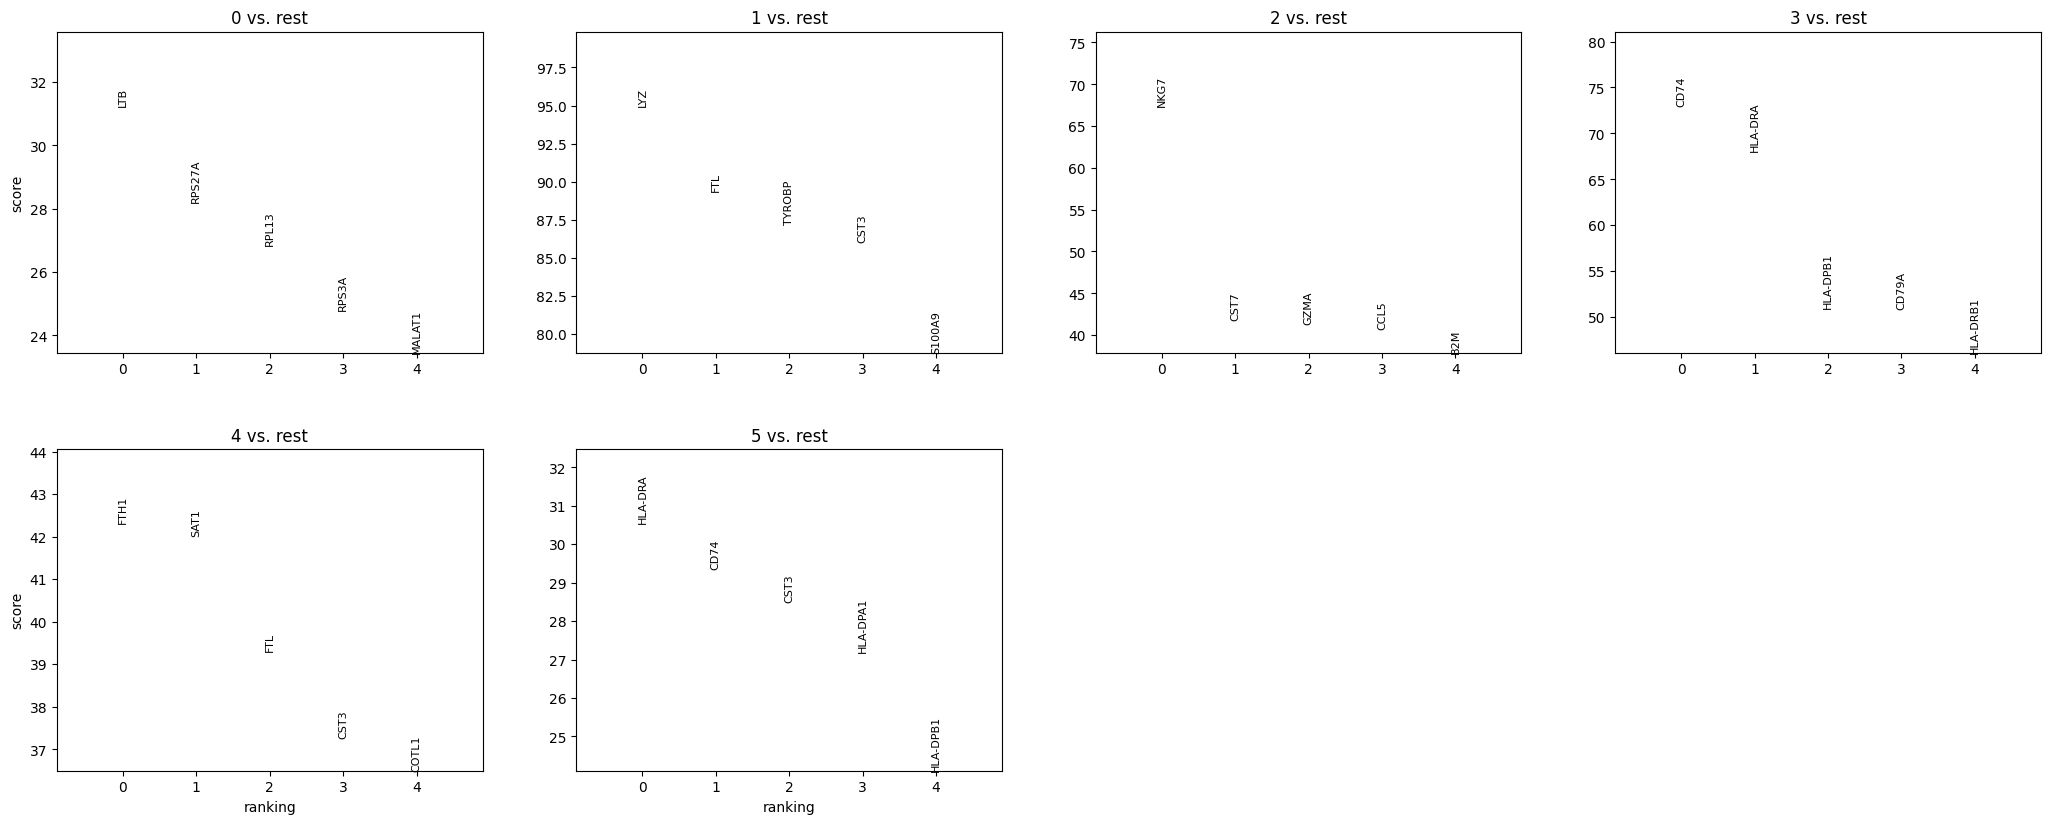

In [62]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False) #sharey=false -  Allows each panel to have its own y-axis scaling


In [63]:
cluster_to_celltype = {
     '0': 'T-cells',
     '1': 'Monocytes',
     '2': 'NK cells',
     '3': 'B cells',
     '4': 'Macrophages',
     '5': 'Dendritic Cells'
}

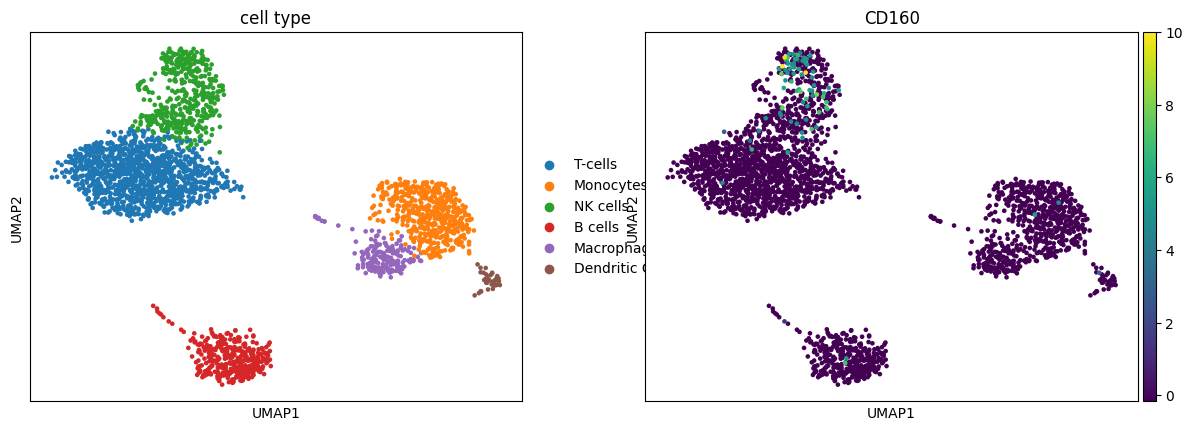

In [64]:
adata.obs['cell type'] = adata.obs['leiden'].map(cluster_to_celltype)

sc.pl.umap(adata, color=['cell type', 'CD160'])


In [39]:
import pandas as pd

# Extract data
cd160_expr = adata[:, 'CD160'].X.toarray().flatten()  # make sure it's a 1D array
cluster_labels = adata.obs['leiden']

# Group by cluster
expr_by_cluster = pd.DataFrame({'cluster': cluster_labels, 'CD160': cd160_expr})
mean_expr = expr_by_cluster.groupby('cluster').mean().sort_values('CD160', ascending=False)

print(mean_expr)

            CD160
cluster          
2        0.721160
5       -0.075706
3       -0.127699
0       -0.143575
1       -0.145665
4       -0.167414


/var/folders/s1/334w72fn4gn4f_6nf99tmqnm0000gn/T/ipykernel_22191/2033988898.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr = expr_by_cluster.groupby('cluster').mean().sort_values('CD160', ascending=False)
